In [72]:
import tensorflow as tf

import sys

print(sys.version)

print(tf.__version__)

3.12.1 (tags/v3.12.1:2305ca5, Dec  7 2023, 22:03:25) [MSC v.1937 64 bit (AMD64)]
2.16.1


In [73]:
#회귀분석1
import numpy as np

np.random.seed(7)

#데이터 로딩, 시작36행은 건너뜀

data=np.genfromtxt("c:/data/regression/x09.txt",skip_header=36)

data[:10]


array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.]])

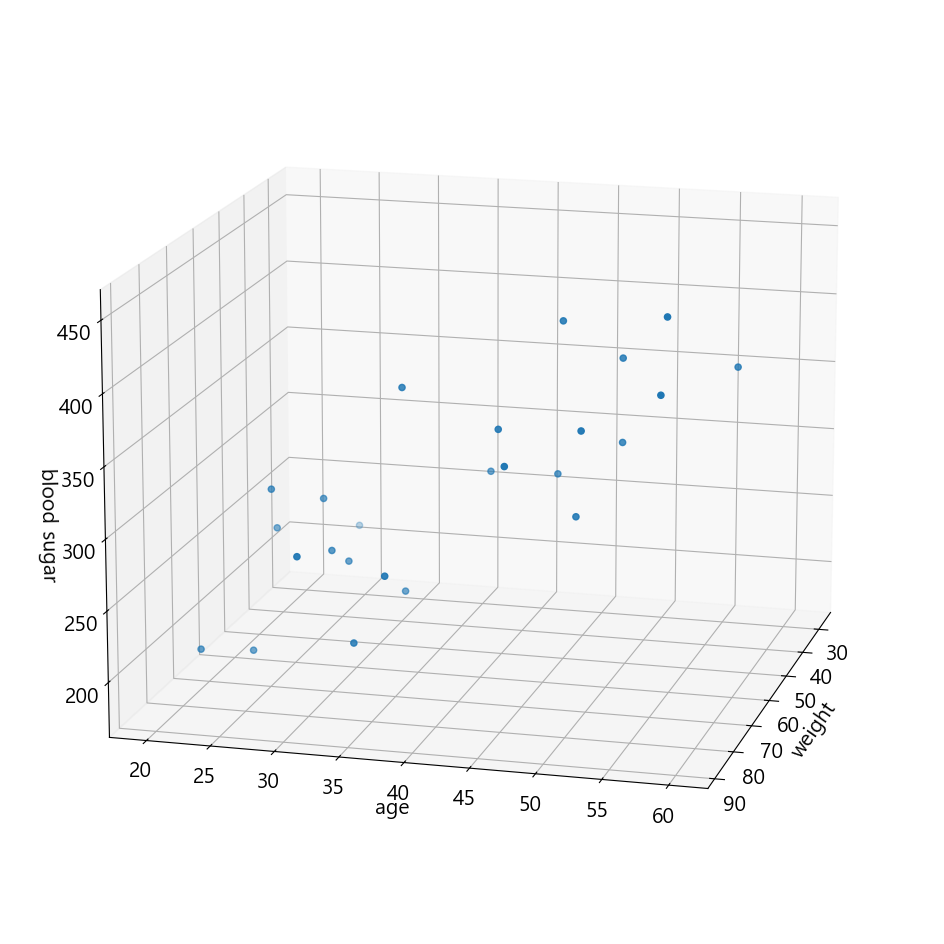

In [74]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

xdata=np.array(data[:,2],dtype=np.float32)
ydata=np.array(data[:,3],dtype=np.float32)
zdata=np.array(data[:,4],dtype=np.float32)
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d') #1행 1열 1번 (3차원)
ax.scatter(xdata,ydata,zdata)
ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")
ax.view_init(15,15) #출력 각도 설정

plt.show()

In [75]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
#데이터를 케라스에 맞게 변환
#독립변수
x_data=np.array(data[:,2:4],dtype=np.float32)

#종속변수
y_data=np.array(data[:,4],dtype=np.float32)

In [76]:
#회귀분석 모델 생성

model=Sequential() #신경망 모형
model.add(Dense(1,input_shape=(2,))) #layer 추가 Dense 밀집행렬

#손실함수 : 인공신경망에서 학습을 통해 최적의 가중치 매개변수를 결정하기 위한 기준으로 사용하는 함수(오차를 계산하는 함수)
#최적화함수 : 오차를 줄이기 위해 weight, bias 를 수정하는 함수
#손실함수의 결과값을 가장 작게 만드는 것이 신경망 학습의 목표
#손실함수의 결과값을 작게 만들기 위해 가중치 매개변수를 조절해가는 과정이 학습 과정
#평균제곱오차(Meam Squared Error, MSE), 회귀분석에서 많이 사용하는 손실함수
# https://keras.io/ko/optimizers/  옵티마이저 참조

rmsprop=RMSprop(learning_rate=0.01) #학습률 0.01
model.compile(loss='mse',optimizer=rmsprop) #loss 손실함수
model.summary()

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

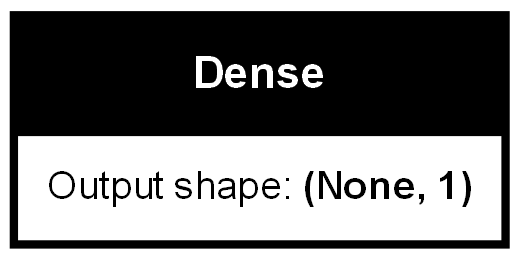

In [77]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

In [78]:
hist=model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 57221.3398
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 55600.0039
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 54447.3281
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 53496.0508
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 52661.7031
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 51905.2266
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 51204.8555
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 50547.1016
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 49922.9336
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 49325.9844
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 48751.5781
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 48196.1914
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 47657.0586
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 47132.0234
Epoch 15/1000
1/1 

In [79]:
hist.history.keys()

dict_keys(['loss'])

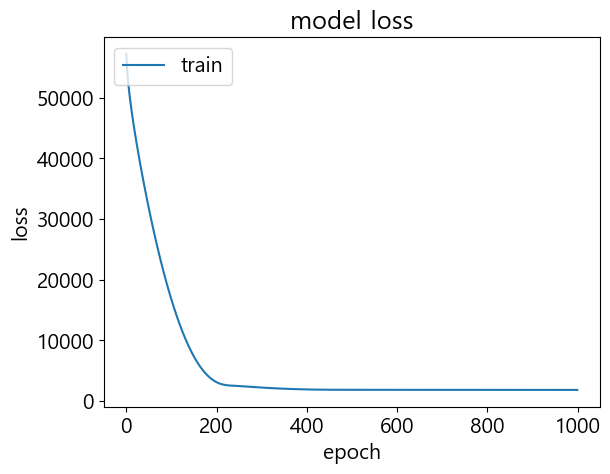

In [80]:
plt.plot(hist.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"],loc="upper left")
plt.show()

In [81]:
#새로운 데이터로 예측
#체중 100kg, 40세
#1차원 배열을 1행 2열의 2차원 배열로 변환

model.predict(np.array([100,40]).reshape(1,2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[351.92682]], dtype=float32)

In [82]:
#체중 60kg, 25세

model.predict(np.array([60,25]).reshape(1,2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[220.45299]], dtype=float32)

In [83]:
#회귀선을 그리기 위한 작업
#가중치와 절편,편향(bias)

w, b =model.get_weights()
w, b

(array([[1.2042421],
        [5.5536103]], dtype=float32),
 array([9.358198], dtype=float32))

In [84]:
# linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)

# start부터 stop의 범위에서 num개를 균일한 간격으로 데이터를 생성하고 배열을 만드는 함수

x=np.linspace(20,100,50).reshape(50,1) #20~100까지 50등분
y=np.linspace(10,70,50).reshape(50,1)

x2=np.concatenate((x,y),axis=1) #x,y연결

#행렬곱셈

z=np.matmul(x2,w)+b

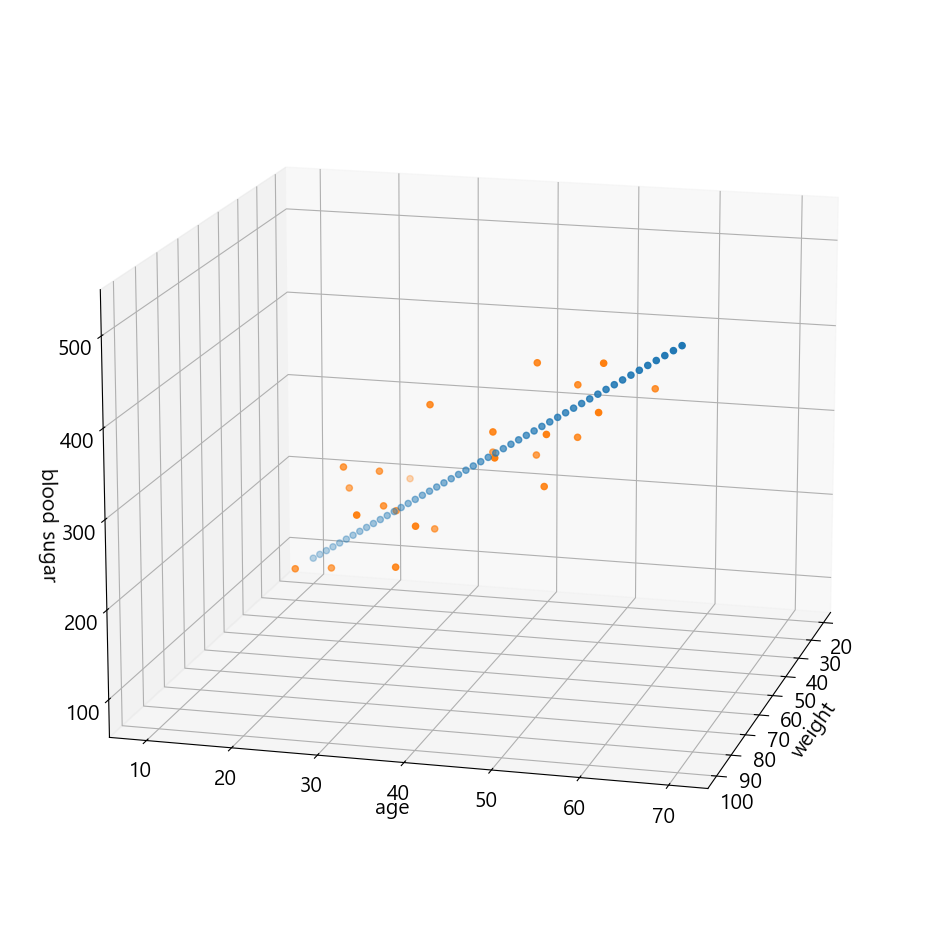

In [85]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')

#회귀선
ax.scatter(x,y,z)

#산점도
ax.scatter(xdata,ydata,zdata)
ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")
ax.view_init(15,15)
plt.show()

In [86]:
# 회귀분석2(주택가격 데이터셋)

# 주택 가격 예측: 회귀분석
# 회귀분석 : 연속적인 값을 예측
# 예) 과거 기상 데이터를 입력하여 내일의 기온을 예측
# 보스턴 주택 가격 데이터셋
# 1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터로 주택 가격 예측
# 샘플 개수 : 506개(학습용 404개, 검증용 102개)
from keras.datasets import boston_housing

# c:/사용자/본인계정/.keras/datasets 디렉토리에 다운로드됨
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [87]:
#학습용 404개, 검증용 102개, 13개의 변수

print(X_train.shape)
print(X_train.shape[1])

(404, 13)
13


In [88]:
X_test.shape

(102, 13)

In [89]:
# 독립 변수 목록
# 1. Per capita crime rate.
# 2. Proportion of residential land zoned for lots over 25,000
#    square feet.
# 3. Proportion of non-retail business acres per town.
# 4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# 5. Nitric oxides concentration (parts per 10 million).
# 6. Average number of rooms per dwelling.
# 7. Proportion of owner-occupied units built prior to 1940.
# 8. Weighted distances to five Boston employment centres.
# 9. Index of accessibility to radial highways.
# 10. Full-value property-tax rate per $10,000.
# 11. Pupil-teacher ratio by town.
# 12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
# 13. % lower status of the population.
# 종속변수 : 주택의 가격(천달러 단위)
# 주택가격(10000~50000달러, 1970년대 중반 가격)

y_train[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

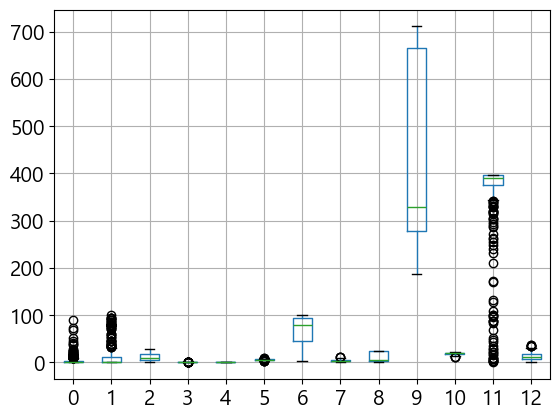

In [90]:
import pandas as pd

import matplotlib.pyplot as plt

pd.DataFrame(X_train).boxplot()

plt.show()

In [91]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() #평균 0, 표준편차 1로 만드는 스케일러
scaler.fit(X_train) #패턴분석

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


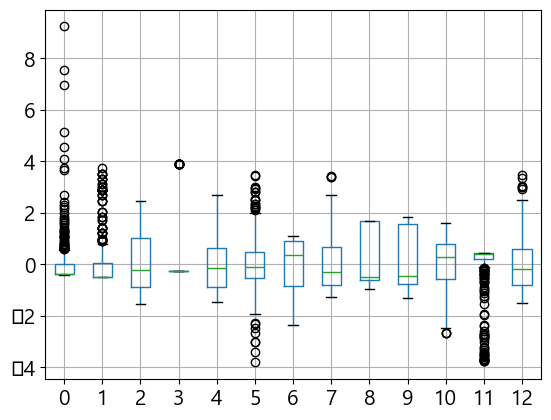

In [92]:
pd.DataFrame(X_train_scaled).boxplot()

plt.show()

In [93]:
# 활성화 함수 : 입력데이터를 적절하게 처리하여 출력데이터를 만들어내는 함수
# input data -> {activation function} -> output data
# 활성화 함수의 종류 : 탄젠트(thanh) 함수, 시그모이드(sigmoid) 함수, ReLU 함수
# 탄젠트 함수나 시그모이드 함수보다 학습시간이 빨라서 최근에는 ReLU(Rectified Linear Unit)가 많이 사용되고 있음
from keras import models, layers

#64개의 노드를 가진 은닉층 2개의 신경망
def build_model():
    model = models.Sequential()
    #relu : 활성화함수
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))

    #출력층(1개의 노드, 하나의 값을 예측하는 회귀분석의 경우 활성화 함수가 없는 선형층을 사용함)
    model.add(layers.Dense(1))

    #mse 손실 함수를 사용하여 컴파일
    #mse : 평균 제곱 오차(mean squared error) - 예측값과 실제값의 거리의 제곱
    #mae : 평균 절대 오차, 예측값과 실제값의 거리의 절대값
    #metrics 평가지표, 검증용 데이터셋으로 평가하는 기준
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_model()
model.summary()

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

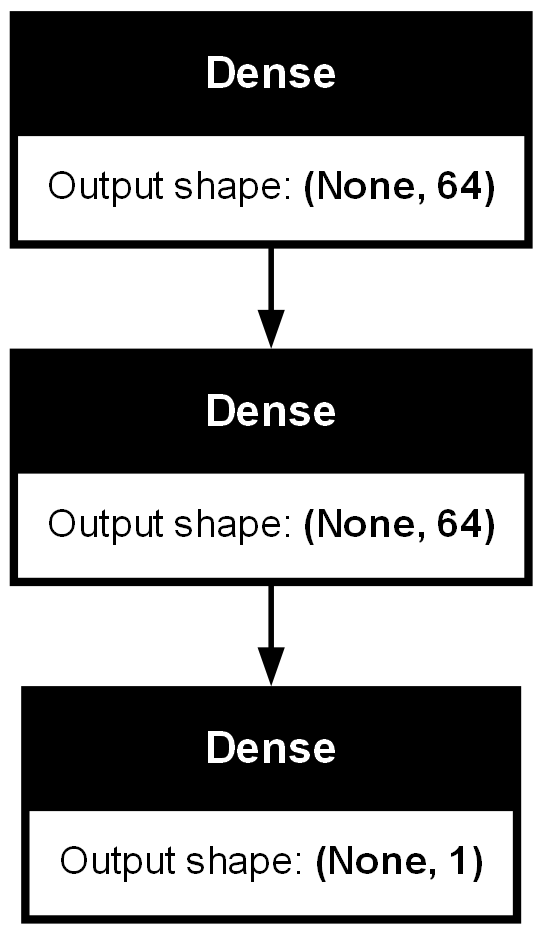

In [94]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

In [95]:
import matplotlib.pyplot as plt
import numpy as np 

def train(x_train, y_train, epochs=21):
    for epoch in np.arange(1, epochs):
      hist=model.fit(x_train, y_train)
      plt.plot(y_train, c='r', label='real')
      plt.plot(model.predict(x_train), c='b', label='pred')
      plt.legend()
      mae=hist.history['mae'][0]
      plt.title(f"Epoch {epoch:02d}, mae {mae:.2f}")
      plt.savefig(f"img/plot_{epoch:02d}.png")
      plt.clf()

In [96]:
train(X_train_scaled,y_train)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 527.2275 - mae: 21.1156  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 453.8750 - mae: 19.0807  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 321.5699 - mae: 15.9338  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 244.6889 - mae: 13.3103
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 157.1689 - mae: 9.9503  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 116.8000 - mae: 8.2736
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 64.5522 - mae: 6.1275
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49.2624 - mae: 5.3301 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 38.9276 - mae: 4.7011  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/

<Figure size 640x480 with 0 Axes>

In [97]:
import cv2

import glob



img_array=[]

size=(0,0)

for filename in  sorted(glob.glob('img/*.png')):

    img=cv2.imread(filename)

    height,width,layers=img.shape

    size=(width,height)

    img_array.append(img)

out=cv2.VideoWriter('model.mp4', cv2.VideoWriter_fourcc(*'H264'), 0.5, size)

for i in range(len(img_array)):

    out.write(img_array[i])



out.release()

In [98]:
hist=model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 12.3978 - mae: 2.5051
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 13.9201 - mae: 2.6362  
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 12.2350 - mae: 2.4456
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 12.3015 - mae: 2.5226
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.1646 - mae: 2.5818
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.8190 - mae: 2.5534
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 12.3511 - mae: 2.3278  
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 11.5692 - mae: 2.4789 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 12.7025 - mae: 2.3998  
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 11.4390 - mae: 2.3198 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 10.3259 - mae: 2.2784 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 9.3964 - mae: 2.2263  
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s

In [99]:
# 검증용 데이터로 모델 평가

mse, mae = model.evaluate(X_test_scaled, y_test, verbose=1)

print(mse)
print(mae) 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.7596 - mae: 2.4707
47.40107345581055
2.7468204498291016


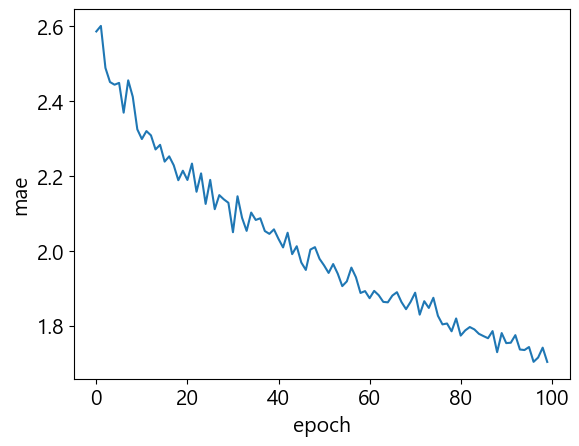

In [100]:
plt.plot(hist.history["mae"])
plt.ylabel("mae")
plt.xlabel("epoch")
plt.show()

In [101]:
# iris

import seaborn as sns

#붓꽃 데이터셋 로딩
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [102]:
#품종 확인

iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [103]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X=iris.iloc[:, :4].values # 독립변수
y=iris.iloc[:,4].values  #종속변수
print(y[:5])

encoder=LabelEncoder() #문자열에 label을 붙임

y1=encoder.fit_transform(y)
print(y1[:5])

y2=pd.get_dummies(y1).values #종속변수에 대한 원핫인코딩 처리
print(y2[:5])

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
[0 0 0 0 0]
[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]]


In [104]:
from sklearn.model_selection import train_test_split

#학습용, 검증용 데이터셋 구분

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, stratify=y,random_state=10)

In [105]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

#모델 생성
model = Sequential()
model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
sgd = SGD(learning_rate=0.01)  
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#               손실                            최적화(오차수정)    평가기준

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,675 (18.26 KB)

 Trainable params: 4,675 (18.26 KB)

 Non-trainable params: 0 (0.00 B)

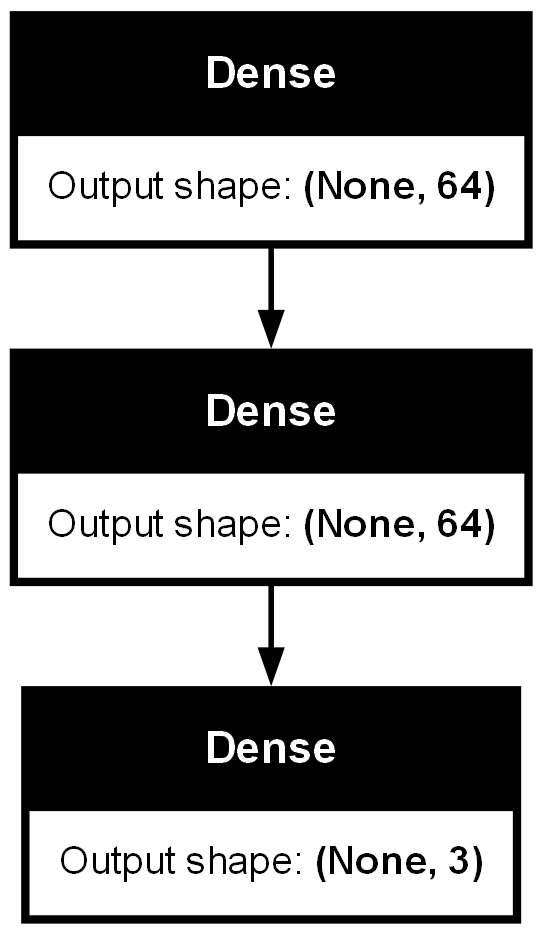

In [107]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

In [108]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

es = EarlyStopping(monitor='val_loss', patience=10) 
#   조기학습종료      기준                횟수

# 학습 과정에서 만들어진 최적의 파라미터 조합으로 모형을 저장
mc = ModelCheckpoint("iris_best.keras", save_best_only=True)

# 학습이 잘 안될 때 학습률을 동적으로 조절하는 옵션
rlr = ReduceLROnPlateau(factor=0.1, patience=5) #기존 학습률*factor (배수)

# 학습 과정의 주요 history를 csv로 저장
csvlogger = CSVLogger("mylog.csv")  
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[es, mc, rlr, csvlogger])

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3750 - loss: 1.0748 - val_accuracy: 0.1667 - val_loss: 1.1196 - learning_rate: 0.0100
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3867 - loss: 0.9802 - val_accuracy: 0.4167 - val_loss: 1.0064 - learning_rate: 0.0100
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5065 - loss: 0.9317 - val_accuracy: 0.4583 - val_loss: 0.9444 - learning_rate: 0.0100
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5182 - loss: 0.8972 - val_accuracy: 0.7083 - val_loss: 0.8888 - learning_rate: 0.0100
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5924 - loss: 0.8661 - val_accuracy: 0.7917 - val_loss: 0.8477 - learning_rate: 0.0100
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6992 - loss: 0.8502 - val_accuracy: 0.8333 - val_loss: 0.8226 - learning_rate: 0.0100
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7409 - loss: 0.8246 - val_accuracy: 0.8

In [109]:
from keras.models import load_model

model=load_model('iris_best.keras')  
model.evaluate(X_test, y_test, verbose=0)

[0.3806666135787964, 0.8999999761581421]

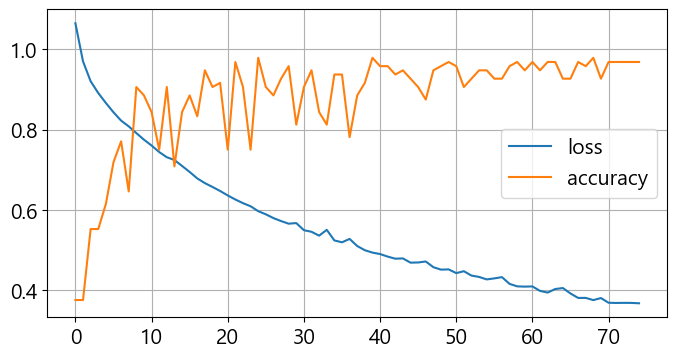

In [110]:
import matplotlib.pyplot as plt

#그래프 출력

plt.figure(figsize=(8,4))
plt.plot(hist.history['loss']) #손실률
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [111]:
#모델 평가

loss, accuracy = model.evaluate(X_test, y_test,  verbose=0)

print("정확도 = {:.2f}".format(accuracy))

정확도 = 0.90


In [112]:
import numpy as np
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)

print(pred[:10])
y_test_class = np.argmax(y_test,axis=1)

pred_class = np.argmax(pred,axis=1)

print(y_test_class[:10])
print(pred_class[:10])
print(confusion_matrix(y_test_class,pred_class))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.02421555 0.45253417 0.52325034]
 [0.89504254 0.09106123 0.01389628]
 [0.02309472 0.40073946 0.57616585]
 [0.01407864 0.39061704 0.59530437]
 [0.10339449 0.5539756  0.3426299 ]
 [0.00705119 0.32431388 0.66863495]
 [0.85621506 0.12315033 0.02063468]
 [0.00551473 0.26270753 0.7317777 ]
 [0.00646518 0.26339373 0.73014104]
 [0.95759296 0.03893442 0.00347266]]
[1 0 1 2 1 2 0 2 2 0]
[2 0 2 2 1 2 0 2 2 0]
[[10  0  0]
 [ 0  7  3]
 [ 0  0 10]]


In [113]:
model.save('c:/data/iris/iris.keras')

In [114]:
# titanic

import pandas as pd
#데이터 로딩
df = pd.read_csv('c:/data/titanic/train3.csv')
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


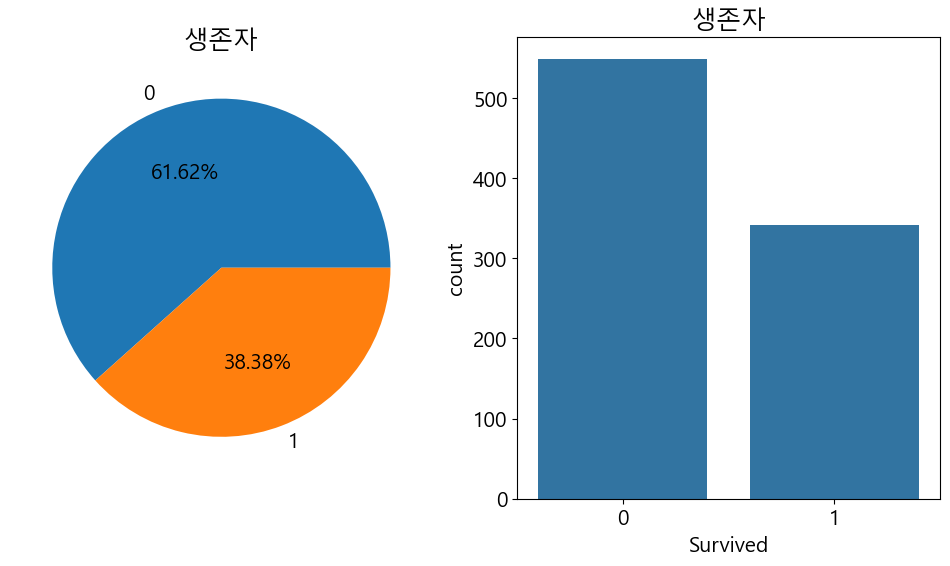

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

f,ax=plt.subplots(1,2,figsize=(12,6))
df['Survived'].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('생존자')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=df,ax=ax[1])
ax[1].set_title('생존자')
plt.show()

<Axes: >

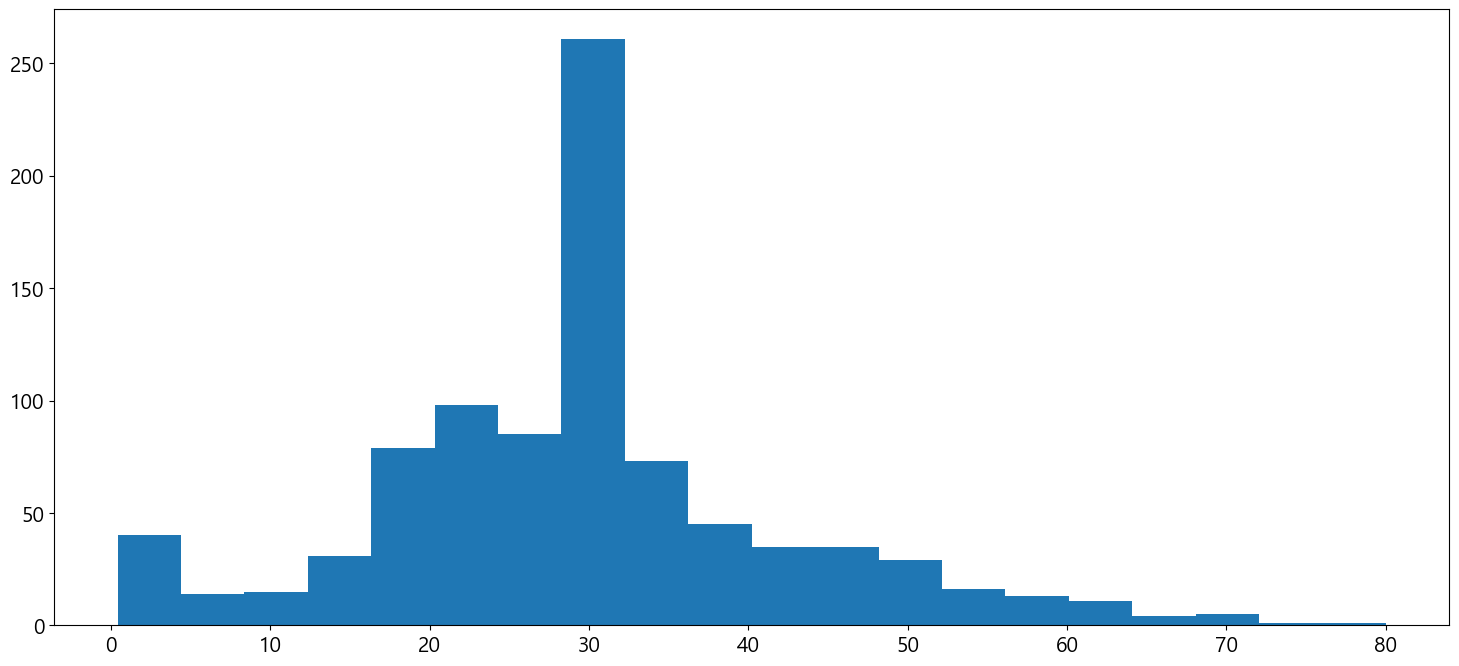

In [116]:
#승객들의 연령 분포
df['Age'].hist(bins=20, figsize=(18,8),grid=False)

In [117]:
#객실등급별 통계
df.groupby('Pclass1').mean()

,Survived,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
Pclass1,,,,,,,,,
0,0.305185,0.272593,0.727407,0.674074,0.325926,27.412963,0.557037,0.389630,15.580055
1,0.629630,0.000000,0.000000,0.564815,0.435185,37.089907,0.416667,0.356481,84.154687


In [118]:
df.groupby('Pclass2').mean()

,Survived,Pclass1,Pclass3,male,female,Age,SibSp,Parch,Fare
Pclass2,,,,,,,,,
0,0.360679,0.305516,0.694484,0.663366,0.336634,29.726082,0.554455,0.381895,35.208073
1,0.472826,0.000000,0.000000,0.586957,0.413043,29.884946,0.402174,0.380435,20.662183


In [119]:
df.groupby('Pclass3').mean()

,Survived,Pclass1,Pclass2,male,female,Age,SibSp,Parch,Fare
Pclass3,,,,,,,,,
0,0.557500,0.54,0.46,0.575000,0.425000,33.775625,0.410000,0.367500,54.948135
1,0.242363,0.00,0.00,0.706721,0.293279,26.486599,0.615071,0.393075,13.675550


c:\python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


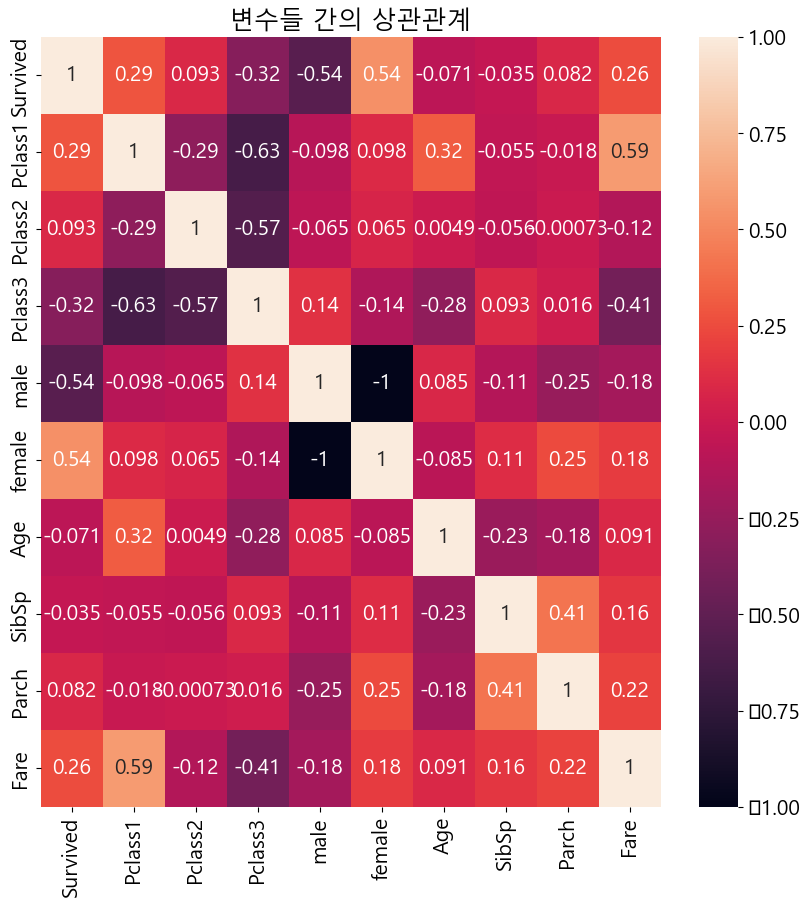

In [120]:
#상관관계 분석
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linecolor="white")
plt.title('변수들 간의 상관관계')
plt.show()

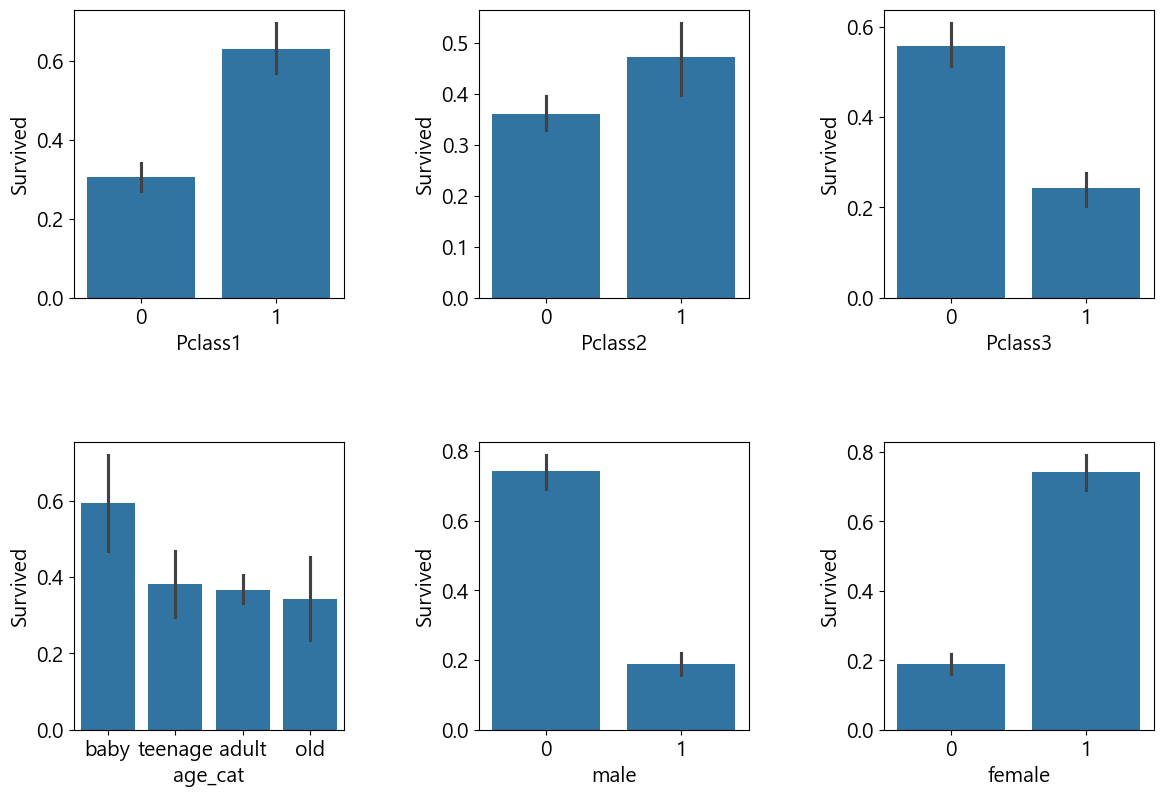

In [121]:
#연령대를 나눠서 분석
df['age_cat'] = pd.cut(df['Age'],bins=[0,10,20,50,100],include_lowest=True,labels=['baby','teenage','adult','old'])
plt.figure(figsize=[12,8])

plt.subplot(231)

#막대 위의 세로선은 오차범위를 의미함(기본값은 ci=95)

sns.barplot(x='Pclass1', y='Survived', data=df)

plt.subplot(232)

sns.barplot(x='Pclass2', y='Survived', data=df)

plt.subplot(233)

sns.barplot(x='Pclass3', y='Survived', data=df)

plt.subplot(234)

sns.barplot(x='age_cat', y='Survived', data=df)

plt.subplot(235)
sns.barplot(x='male',y='Survived',data=df)

plt.subplot(236)

sns.barplot(x='female',y='Survived',data=df)

plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)

plt.show()

#1등석,2등석인 경우 생존률이 높음, 3등석은 생존률이 낮음

#baby와 female의 생존률이 높음

C:\Users\user\AppData\Local\Temp\ipykernel_12332\1112186586.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Age"][(df["Survived"] == 0)], ax = ax, color="blue", shade = True)
C:\Users\user\AppData\Local\Temp\ipykernel_12332\1112186586.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Age"][(df["Survived"] == 1)], ax =g, color="green", shade= True)


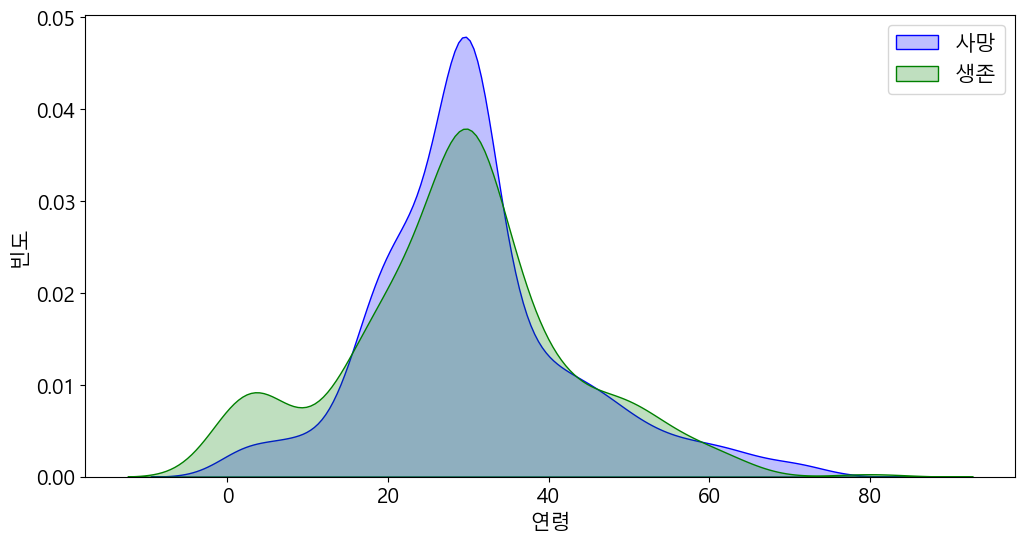

In [122]:
#나이 분포 곡선(어린아이들의 생존률이 상대적으로 높음)

f,ax = plt.subplots(figsize=(12,6))

#커널 밀도(kernel density) 그래프 : 히스토그램보다 부드러운 형태의 분포 곡선

g = sns.kdeplot(df["Age"][(df["Survived"] == 0)], ax = ax, color="blue", shade = True)

g = sns.kdeplot(df["Age"][(df["Survived"] == 1)], ax =g, color="green", shade= True)

g.set_xlabel("연령")

g.set_ylabel("빈도")

g.legend(["사망","생존"])

In [123]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [124]:
train_cols=df.columns[1:-1]

X=df[train_cols] #독립변수

y=df['Survived'] #종속변수

In [125]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )

y_samp = pd.DataFrame(data=y_sample,columns=['Survived'])

df_samp=pd.concat([X_samp,y_samp],axis=1)

In [126]:
X = X_samp[train_cols] # 독립변수

y = y_samp["Survived"]

In [127]:
from sklearn.model_selection import train_test_split

#데이터셋 구분

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=7)

In [128]:
from keras.models import Sequential

from keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [129]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,761 (53.75 KB)

 Trainable params: 13,761 (53.75 KB)

 Non-trainable params: 0 (0.00 B)

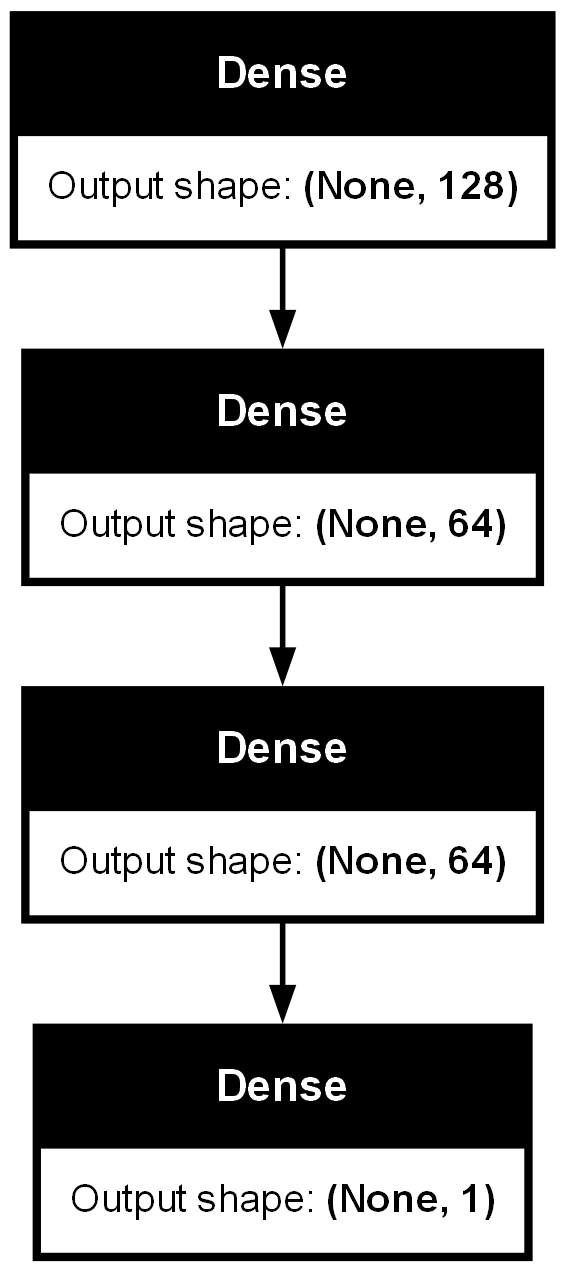

In [130]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

<Axes: >

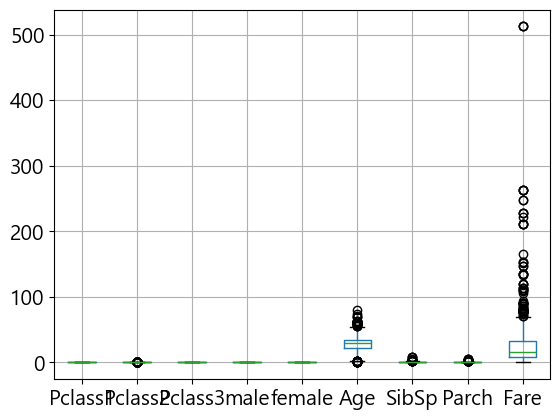

In [131]:
X_train.boxplot()

In [132]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() #평균 0, 표준편차 1

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)

X_test_scaled=scaler.transform(X_test)

# 넘파이 배열로 바뀜

# 넘파이 배열 => 데이터프레임

X_train_scaled=pd.DataFrame(X_train_scaled)

X_test_scaled=pd.DataFrame(X_test_scaled)

<Axes: >

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


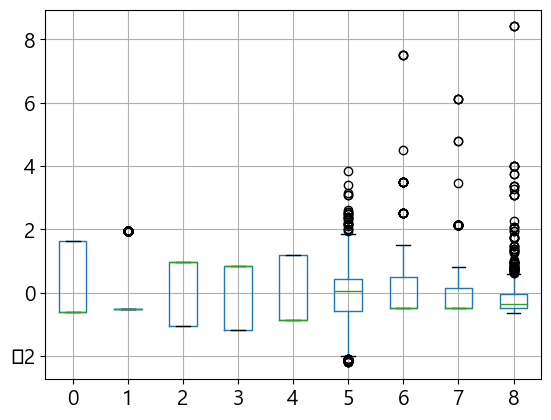

In [133]:
X_train_scaled.boxplot()

In [134]:
from joblib import dump

dump(scaler, 'c:/data/titanic/scaler.model', compress=True)

['c:/data/titanic/scaler.model']

Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.6946 - loss: 0.2225
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.7880 - loss: 0.1605
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.7800 - loss: 0.1441
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.7978 - loss: 0.1424
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8076 - loss: 0.1472  
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.8131 - loss: 0.1365
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8223 - loss: 0.1328  
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.8168 - loss: 0.1444
Epoch 9/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8230 - loss: 0.1352  
Epoch 10/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.8157 - loss: 0.1346
Epoch 11/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8200 - loss: 0.1266  
Epoch 12/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 91

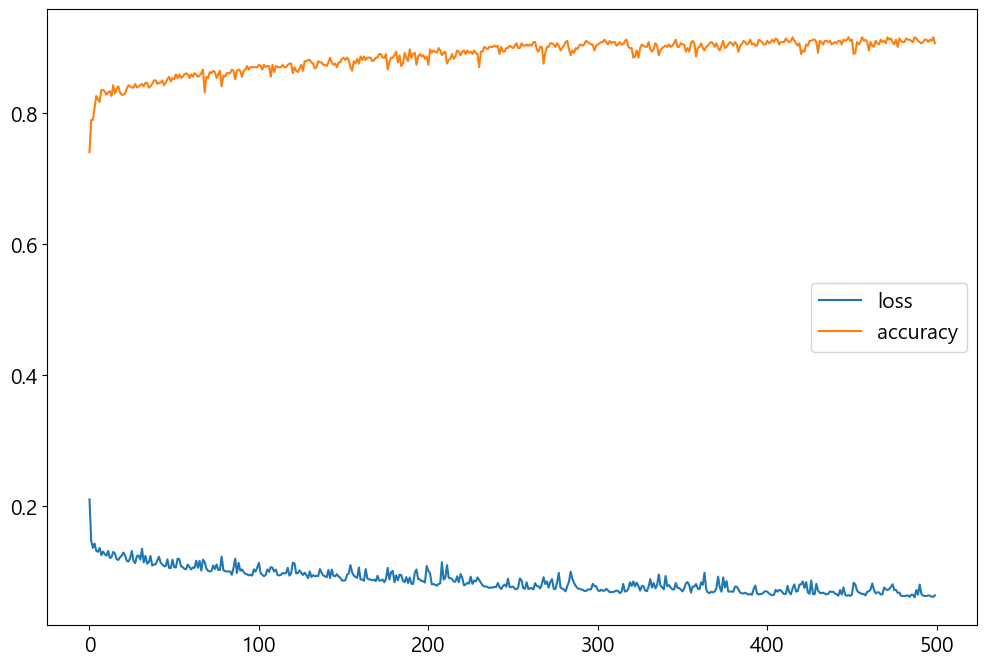

In [135]:
#모델 학습

hist = model.fit(X_train_scaled, y_train, epochs=500) #손실감소

plt.figure(figsize=(12,8))

plt.plot(hist.history['loss'])

plt.plot(hist.history['accuracy'])
plt.legend(['loss','accuracy'])

plt.show()


In [136]:
# 7. 모델 평가

scores = model.evaluate(X_train_scaled, y_train, verbose=1)

print(scores)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.9193 - loss: 0.0597
[0.058411624282598495, 0.9177330732345581]
compile_metrics: 91.77%


In [137]:
scores = model.evaluate(X_test_scaled, y_test, verbose=1)

print(scores)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.7887 - loss: 0.1748
[0.19774913787841797, 0.7737226486206055]
compile_metrics: 77.37%


In [138]:
#1등석, 2등석, 3등석, 남성여부, 여성여부, 나이, 형제자매, 부모자녀, 요금

#3등석, 남성, 19세, 형제자매2, 부모자녀0, 요금50

person1 = [[0, 0, 1, 1, 0, 19, 2, 0, 50]]

#1등석, 여성, 17세, 형제자매0, 부모자녀2, 요금30

person2 = [[1, 0, 0, 0, 1, 17, 0, 2, 30]]

#2등석, 여성, 40세, 형제자매1, 부모자녀1, 요금70

person3 = [[0, 1, 0, 0, 1, 40, 1, 1, 70]]

#스케일링을 해야 할 경우

person1=scaler.transform(person1)

person2=scaler.transform(person2)

person3=scaler.transform(person3)

print(model.predict(person1))

print(model.predict(person2))
print(model.predict(person3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[0.00033311]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[1.]]


c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [139]:
#모형을 지정한 디렉토리에 저장

model.save('c:/data/titanic/titanic.keras')

In [140]:
#netron 다운로드 및 테스트  

#https://github.com/lutzroeder/netron

In [141]:
# ozone

import pandas as pd

# csv 파일을 로딩

df = pd.read_csv("c:/data/ozone/ozone2.csv")

df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,1,190.000000,7.4,67,41,0
1,5,2,118.000000,8.0,72,36,0
2,5,3,149.000000,12.6,74,12,0
3,5,4,313.000000,11.5,62,18,0
4,5,5,185.931507,14.3,56,42,1


C:\Users\user\AppData\Local\Temp\ipykernel_12332\3190639805.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data=df, palette=colors)


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

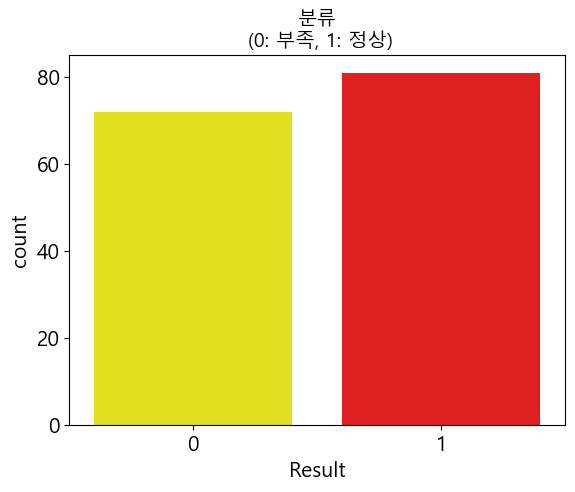

In [142]:
from matplotlib import font_manager, rc

import matplotlib.pyplot as plt

#한글 처리를 위해 폰트 설정

font_name = font_manager.FontProperties(\

fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

import seaborn as sns

colors = ["yellow", "red"]

sns.countplot(x='Result', data=df, palette=colors)

plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)

#불균형 데이터셋

In [143]:
train_cols=['Solar.R', 'Wind', 'Temp']

X = df[train_cols]  

y = df['Result']

In [144]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )

y_samp = pd.DataFrame(data=y_sample,columns=['Result'])

df_samp=pd.concat([X_samp,y_samp],axis=1)

df_samp["Result"].value_counts()

Result
0    72
1    72
Name: count, dtype: int64

c:\python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


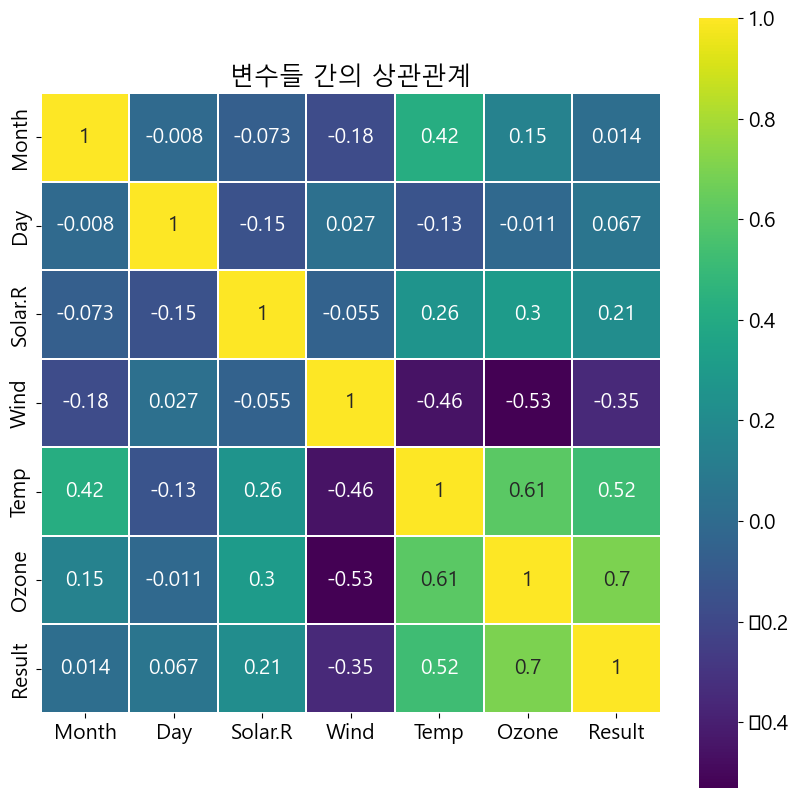

In [145]:
X = X_samp[train_cols]

y = y_samp['Result']

df_samp["Result"].value_counts()

#상관계수 행렬 그래프

plt.figure(figsize=(10,10))

plt.rc('font', size=15)

sns.heatmap(df.corr(), linewidths=0.01, square=True,

            annot=True, cmap=plt.cm.viridis, linecolor="white")

plt.title('변수들 간의 상관관계')

plt.show()

In [146]:
from sklearn.model_selection import train_test_split

#데이터셋 구분

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=7)

In [147]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential(name='mymodel')
model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu',name='hidden-1'))
model.add(Dense(64, activation='relu',name='hidden-2'))
model.add(Dense(64, activation='relu',name='hidden-3'))
model.add(Dense(1, activation='sigmoid',name='output'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [148]:
model.summary()

Model: "mymodel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-3 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,993 (50.75 KB)

 Trainable params: 12,993 (50.75 KB)

 Non-trainable params: 0 (0.00 B)

In [149]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() #평균 0, 표준편차 1로 만드는 스케일러

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)

X_test_scaled=scaler.transform(X_test)

In [150]:
from datetime import datetime  

import tensorflow as tf  

logdir="c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")  

logdir

'c:/logs/20240328-141755'

In [151]:
# pip install tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)  

# 모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=500,callbacks=[tensorboard_callback]) #히스토리 저장

Epoch 1/500


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6202 - loss: 0.2425  
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7787 - loss: 0.2222 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.7700 - loss: 0.2061  
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8263 - loss: 0.1874  
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8335 - loss: 0.1750  
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.7766 - loss: 0.1699  
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.7731 - loss: 0.1576  
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7519 - loss: 0.1625 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.7311 - loss: 0.1656  
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.7530 - loss: 0.1552  
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7672 - loss: 0.1384 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.7724 - loss: 0.1531  


In [152]:
#cmd에서 실행
#tensorboard --logdir=로그파일경로
# tensorboard --logdir=c:/logs/20240328-111526
#  http://localhost:6006에서 확인

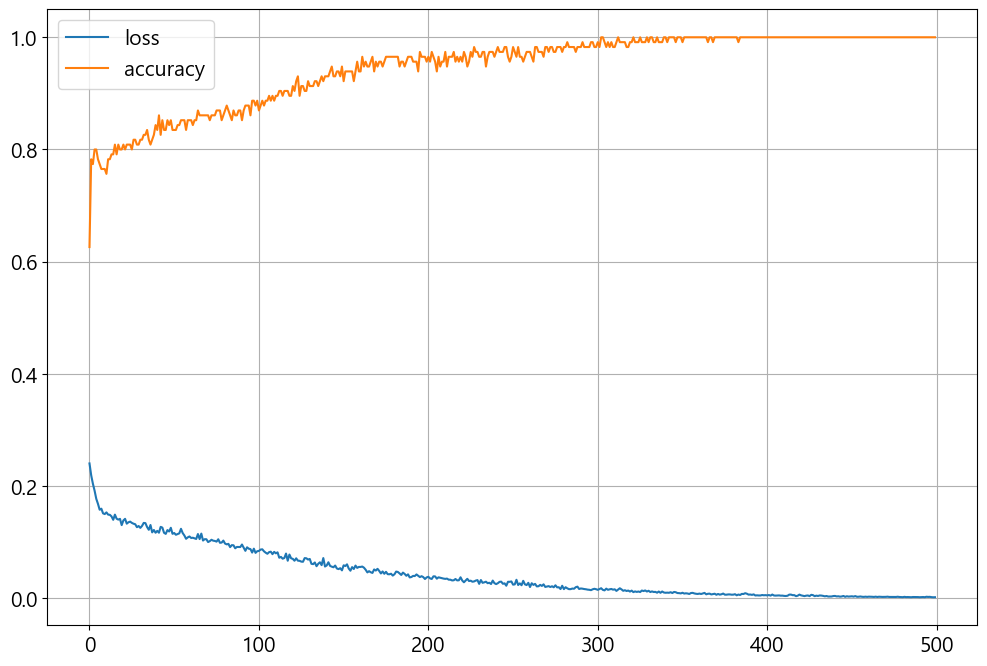

In [153]:
# 모델 학습 과정 그래프

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #학습용 데이터셋의 손실률
plt.plot(hist.history['accuracy']) #학습용 데이터셋의 정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [154]:
# 모델 평가

scores = model.evaluate(X_train_scaled, y_train)

print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

scores = model.evaluate(X_test_scaled, y_test)

print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 1.0000 - loss: 0.0020  
[0.001659090630710125, 1.0]
compile_metrics: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.7241 - loss: 0.2397
[0.23972459137439728, 0.7241379022598267]
compile_metrics: 72.41%


In [155]:
#새로운 값 예측

#일조량 25, 풍량 10.8, 화씨온도 71도일 때의 오존량

test_set = [[25, 10.8, 71]]

test_set=scaler.transform(test_set)

print(model.predict(test_set)) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.7295886]]


c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [156]:
#일조량 20, 풍량 4.3, 화씨온도 70도일 때의 오존량

test_set = [[20, 4.3, 70]]

test_set=scaler.transform(test_set)

print(model.predict(test_set)) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[5.588167e-05]]


c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [157]:
model.save('c:/data/ozone/ozone.keras')

In [158]:
import joblib

joblib.dump(scaler,'c:/data/ozone/scaler.model')

['c:/data/ozone/scaler.model']

In [159]:
# rides

import pandas as pd

df = pd.read_csv("c:/data/rides/rides2.csv")

df.head()

,weekend,num.child,distance,rides,games,wait,clean,overall
0,1,0,114.648259,87,73,60,89,0
1,1,2,27.014097,87,78,76,87,1
2,0,1,63.300975,85,80,70,88,1
3,1,0,25.909931,88,72,66,89,0
4,0,4,54.718307,84,87,74,87,1


C:\Users\user\AppData\Local\Temp\ipykernel_12332\3193018406.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall', data=df, palette=colors)


Text(0.5, 1.0, '분류\n (0: 만족, 1: 불만족)')

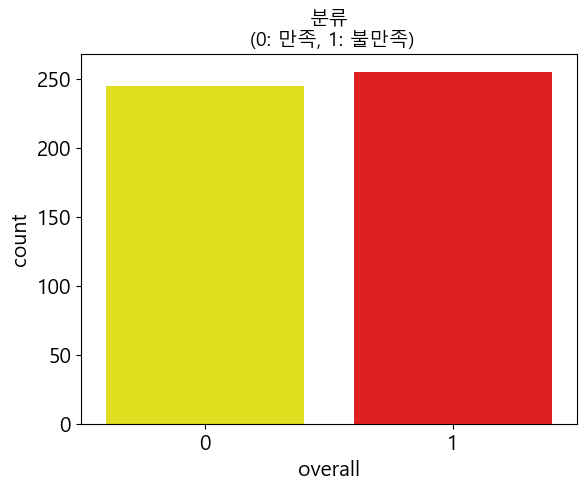

In [160]:
import seaborn as sns

import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

#한글 처리를 위해 폰트 설정

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

colors = ["yellow", "red"]

sns.countplot(x='overall', data=df, palette=colors)

plt.title('분류\n (0: 만족, 1: 불만족)', fontsize=14)

In [161]:
train_cols = df.columns[0:7]

X = df[train_cols] # 독립변수

y = df["overall"]

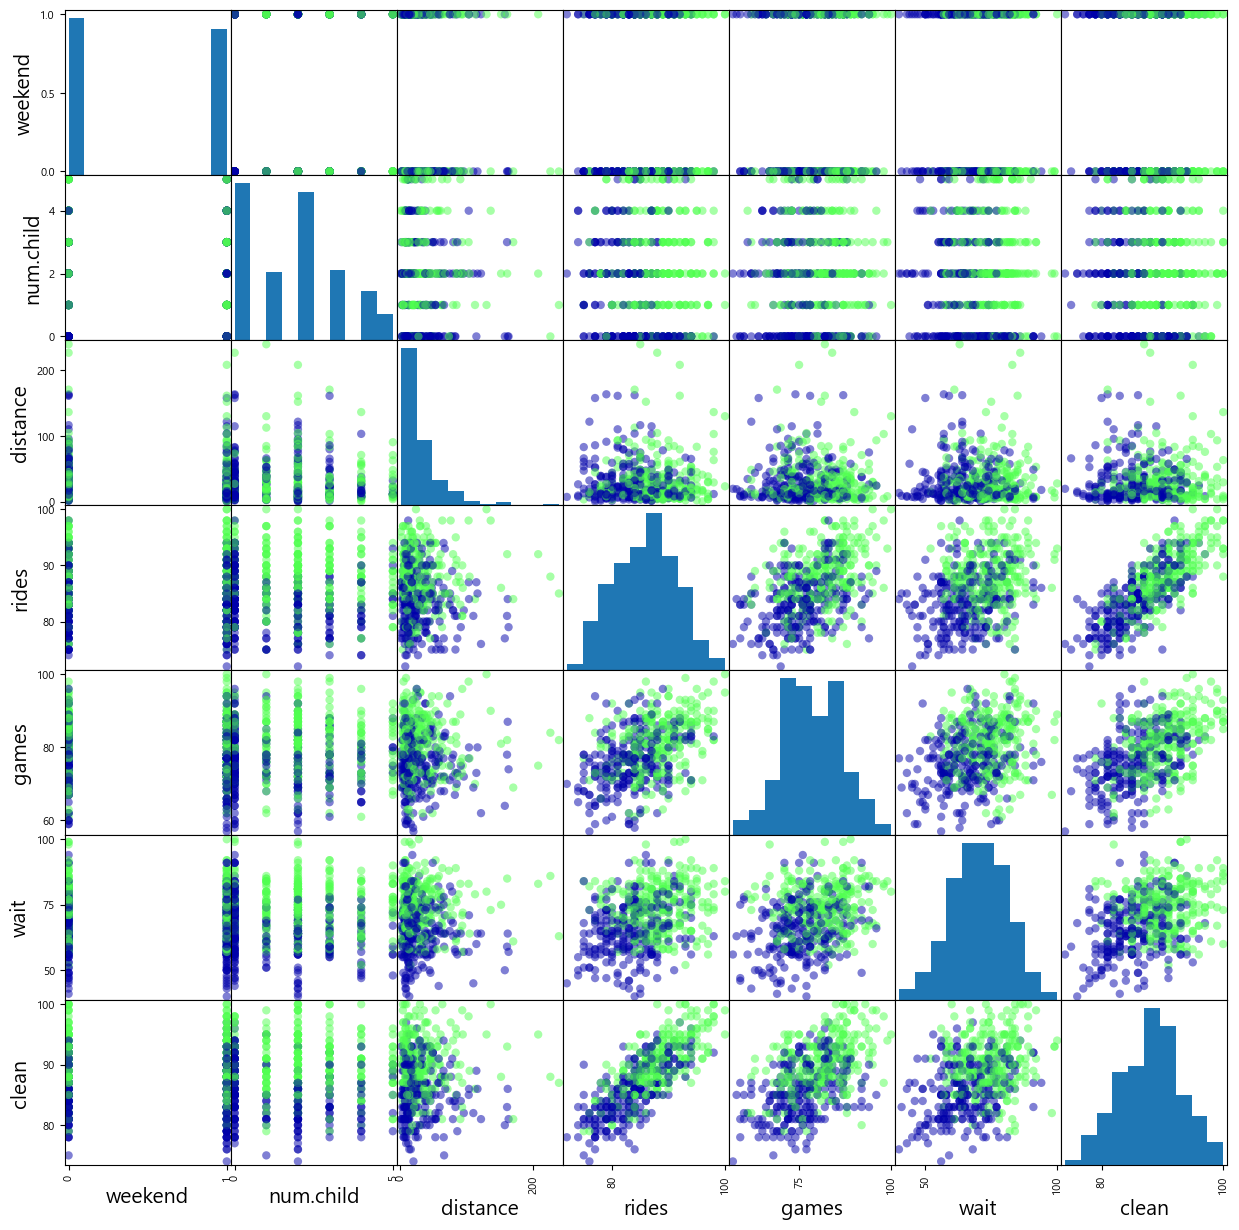

In [162]:
import mglearn
#산점도 행렬 출력

pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15),marker='o', cmap=mglearn.cm3)

plt.show()

In [163]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )

y_samp = pd.DataFrame(data=y_sample,columns=['overall'])

df_samp=pd.concat([X_samp,y_samp],axis=1)

df_samp["overall"].value_counts()

overall
0    245
1    245
Name: count, dtype: int64

In [164]:
X = df_samp[train_cols] # 독립변수

y = df_samp["overall"]

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [166]:
from keras.models import Sequential

from keras.layers import Dense, Dropout

# 분류 모델 구현 함수
def make_model(input_number, hidden_layers, output_number):
                #변수           노드수         출력노드
    #모델 초기화
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation="relu", input_shape=(input_number,), name="Hidden_1"))
    model.add(Dense(hidden_layers[1], activation="relu", name="Hidden_2"))  
    model.add(Dense(hidden_layers[2], activation="relu", name="Hidden_3"))      

    #드롭아웃 계층 Dropout(p) p라는 확률로
    #   출력 노드의 신호를 보내다 말다 함, 과적합 방지
    model.add(Dropout(0.2))

    #출력층
    model.add(Dense(output_number, activation="sigmoid", name='output'))

    model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

    return model    

In [167]:
model = make_model(len(X_train.columns), [128,64,32], 1)

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [168]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_1 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_3 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

<Axes: >

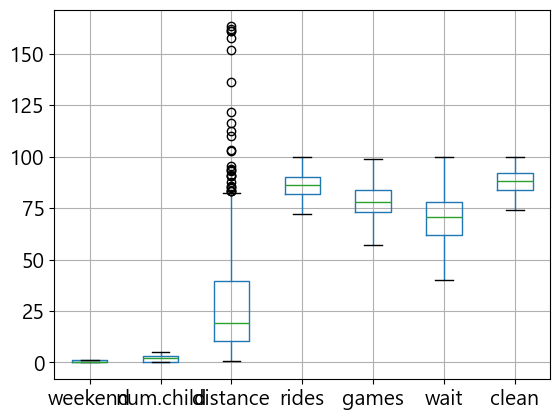

In [169]:
X_train.boxplot() #단위 불균형

[[1.         0.         0.10977143 ... 0.5952381  0.16666667 0.65384615]
 [1.         0.4        0.13554088 ... 0.28571429 0.43333333 0.19230769]
 [0.         0.6        0.06495305 ... 0.5        0.48333333 0.30769231]
 ...
 [0.         0.6        0.0730179  ... 0.66666667 0.68333333 0.73076923]
 [1.         0.4        0.41020732 ... 0.33333333 0.3        0.5       ]
 [1.         0.4        0.31775348 ... 0.4047619  0.68333333 0.46153846]]


<Axes: >

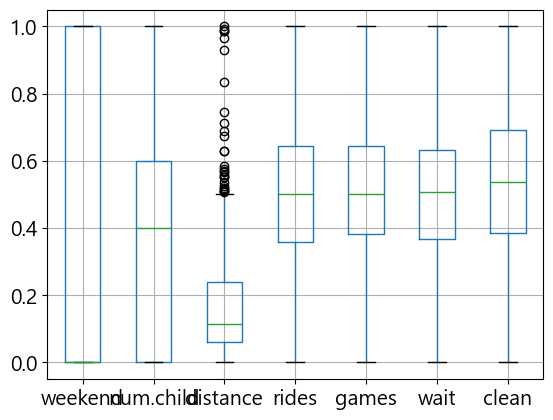

In [170]:
#0~1 범위 변환

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)

df3=pd.DataFrame(X_train_scaled,columns=train_cols)

df3.boxplot()

In [171]:
from datetime import datetime  

import tensorflow as tf

logdir="c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")  

logdir

#tensorboard --logdir=c:/logs/20240328-122320

'c:/logs/20240328-141808'

In [172]:
from keras.callbacks import EarlyStopping  

tb = tf.keras.callbacks.TensorBoard(log_dir=logdir)

es = EarlyStopping(monitor='val_loss', patience=5) #5번 계산x => 끝

hist = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100,callbacks=[tb,es])

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5190 - loss: 0.2493 - val_accuracy: 0.7089 - val_loss: 0.2418
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7104 - loss: 0.2413 - val_accuracy: 0.7215 - val_loss: 0.2364
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7226 - loss: 0.2349 - val_accuracy: 0.6962 - val_loss: 0.2258
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6942 - loss: 0.2287 - val_accuracy: 0.7215 - val_loss: 0.2150
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6988 - loss: 0.2196 - val_accuracy: 0.6962 - val_loss: 0.2030
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7392 - loss: 0.2067 - val_accuracy: 0.7468 - val_loss: 0.1931
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7398 - loss: 0.1966 - val_accuracy: 0.7342 - val_loss: 0.1811
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7887 - loss: 0.1767 - val_accuracy: 0.7215 - 

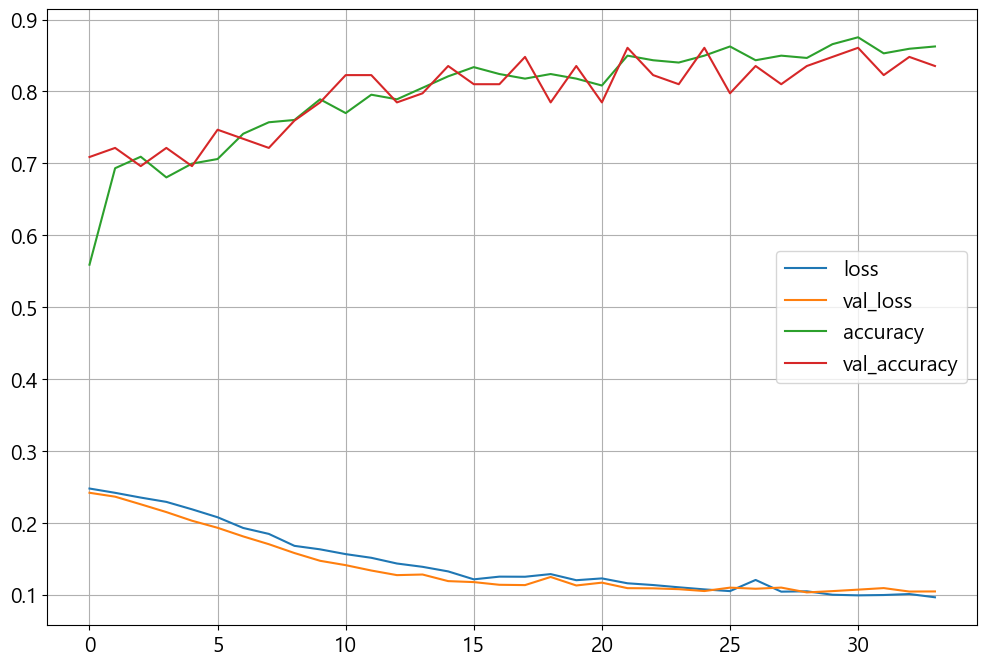

In [173]:
# 모델 학습 과정 표시

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [174]:
# 모델 평가

scores = model.evaluate(X_train_scaled, y_train, verbose=1)

print(scores)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.8784 - loss: 0.0933
[0.09435784071683884, 0.8647959232330322]
compile_metrics: 86.48%


In [175]:
scores = model.evaluate(X_test_scaled, y_test, verbose=1)

print(scores)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.8327 - loss: 0.1282
[0.10598891973495483, 0.8265306353569031]
compile_metrics: 82.65%


In [176]:
model.save('c:/data/rides/rides_keras.keras')

In [177]:
pred=model.predict(X_test_scaled[:5])

pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.92880046],
       [0.03163401],
       [0.09136829],
       [0.46719164],
       [0.8532454 ]], dtype=float32)

In [178]:
from sklearn.preprocessing import MinMaxScaler

import numpy as np

#새로운 값 예측(주말여부, 자녀수, 거리, 놀이기구만족도, 게임만족도, 대기시간, 청결도)

test_set = [[0, 2, 20, 84, 78, 67, 89]]

test_set_scaled=scaler.transform(test_set)

print(model.predict(test_set_scaled)) # 1일 확률 0%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.83898985]]


c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [179]:
#새로운 값 예측(주말여부, 자녀수, 거리, 놀이기구만족도, 게임만족도, 대기시간, 청결도)

test_set = [[1, 0, 10, 90, 78, 67, 89]]

test_set_scaled=scaler.transform(test_set)

print(model.predict(test_set_scaled)) # 1일 확률 0%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[0.1928494]]


c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [180]:
import joblib

#scaler 백업

joblib.dump(scaler, 'c:/data/rides/scaler.sav')

['c:/data/rides/scaler.sav']

In [181]:
#scaler 복원

scaler = joblib.load('c:/data/rides/scaler.sav')

In [182]:
# 신경망 교차검증

import numpy as np
from sklearn.datasets import make_classification

np.random.seed(0) #랜덤시드 고정

number_of_features = 100

X, y = make_classification(n_samples = 100, n_features = number_of_features, n_informative = 3, n_redundant = 0, n_classes = 2, weights = [.5, .5], random_state = 0)
                        #   샘플수

In [183]:
X

array([[-0.16429701,  0.07096484,  0.30553214, ...,  0.8399175 ,
         1.137649  ,  0.12936152],
       [-1.17150856,  0.31032925, -0.58942936, ...,  0.21388667,
         1.34571339, -1.64294734],
       [ 0.04497273, -0.16908307,  0.59812452, ..., -0.63198215,
         0.59335897,  0.00890199],
       ...,
       [-1.0857239 , -0.20271327, -2.6782758 , ..., -0.88509725,
         0.7148753 ,  0.17796003],
       [-0.91643435,  0.12928136, -2.10796932, ..., -0.1057946 ,
        -0.06798357,  0.14981365],
       [ 1.47506909,  1.48980254,  1.83073463, ...,  0.44922531,
         1.27878841,  1.39464494]])

In [184]:
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras import layers

 
def build_model(hp):

    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(

        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),

        #loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        loss='mse',
        metrics=['accuracy'])

    return model

In [185]:
from keras_tuner.tuners import RandomSearch
 
tuner = RandomSearch(

    build_model,
    objective='val_accuracy',
    executions_per_trial=3,
    directory='c:/temp',
    project_name='test1')

In [186]:
tuner = kt.Hyperband(

        build_model, objective ='val_accuracy', max_epochs =5, factor = 3, directory ='c:/temp', project_name ='test2')


Reloading Tuner from c:/temp\test2\tuner0.json


In [187]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [188]:
tuner.search(X, y,

             epochs=5,

             validation_data=(X, y))

In [189]:
tuner.get_best_models(num_models=2)[0].summary()

c:\python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


ValueError: A total of 1 objects could not be loaded. Example error message for object <Dense name=dense_1, built=True>:

The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(96, 1), Received: value.shape=(96, 10). Target variable: <KerasVariable shape=(96, 1), dtype=float32, path=sequential/dense_1/kernel>

List of objects that could not be loaded:
[<Dense name=dense_1, built=True>]

In [ ]:
tuner.get_best_models(num_models=2)[1].summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 96)             │         9,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,666 (41.66 KB)

 Trainable params: 10,666 (41.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
tuner.results_summary()

Results summary
Results in c:/temp\test2
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0005 summary
Hyperparameters:
units: 32
learning_rate: 0.01
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0001
Score: 1.0

Trial 0009 summary
Hyperparameters:
units: 96
learning_rate: 0.01
tuner/epochs: 5
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 1.0

Trial 0001 summary
Hyperparameters:
units: 32
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.800000011920929

Trial 0006 summary
Hyperparameters:
units: 128
learning_rate: 0.001
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0003
Score: 0.7599999904632568

Trial 0008 summary
Hyperparameters:
units: 64
learning_rate: 0.001
tuner/epochs: 5
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.7099999785423279

Trial 0003 summary
Hyperparameters:
units: 128
learni